# Zenith dependence of AixNet predictions

dict_keys(['dnn_xmax', 'zenith', 'energy', 'primary', 'mass'])
879887


/tmp/ipykernel_2744/3218369803.py:12: RuntimeWarning: Mean of empty slice.
  y_means = np.array([dd['dnn_xmax'][bin_idx == i].mean() for i in range(n_bins)])
/home/magnani_3/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/magnani_3/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/magnani_3/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/magnani_3/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[    0 66162 66969 67386 69117 69043 69838 71378 70588 70366 67849 64053]


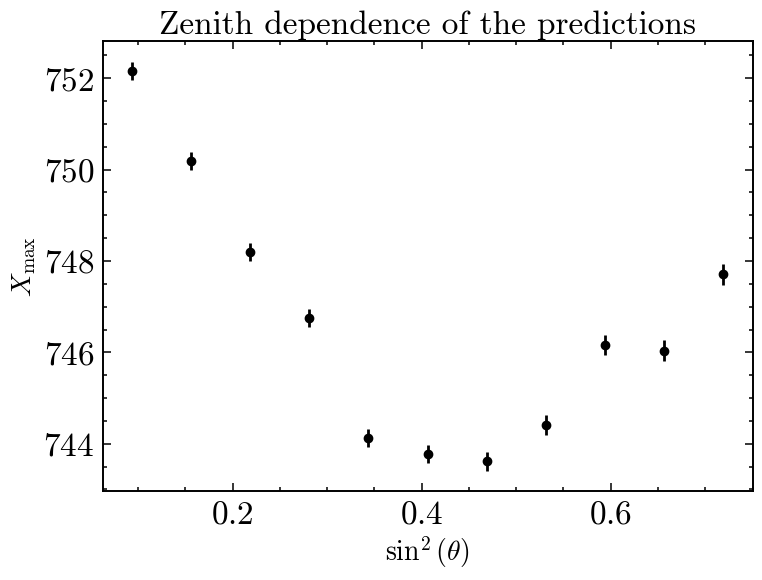

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulated_dipole import *

dd = file_loader('AixNet_SYBILL')
n_bins = 12 
bins = np.linspace(0, 0.75, n_bins+1)
# print(bins)
bin_idx = np.digitize(np.sin(dd['zenith'])**2, bins) 
bin_centers = (bins[1:]+bins[:-1])/2
y_means = np.array([dd['dnn_xmax'][bin_idx == i].mean() for i in range(n_bins)])
y_std = np.array([dd['dnn_xmax'][bin_idx == i].std() for i in range(n_bins)])
n_points = np.array([np.sum(bin_idx == i) for i in range(n_bins)])
y_se = y_std / np.sqrt(n_points)
print(n_points)
val = {
    'x': bin_centers,
    'y': y_means,
    'std_y': y_std,
    'n': n_points
}
valid = val["n"] > 1
null_chisq = [((val["y"][valid][i]-1)/(val["std_y"][valid][i] / val["n"][valid][i]**0.5))**2 for i in range(len(val["x"][valid]))]
null_chisq = np.sum(null_chisq)/(len(val["x"][valid])-1)

plt.figure(figsize=(10, 6))
plt.title('Zenith dependence of the predictions')
plt.errorbar(val['x'], val['y'], yerr=(val['std_y']/np.sqrt(n_points)), linestyle='', marker='o', markersize=6, color='k', ecolor='k', lw=2, label=rf'$\chi^2 = {null_chisq:.2f}$')
plt.hlines(np.mean(y_means), np.min(bins), np.max(bins), color="k", linewidth=1, alpha=0.5)
# plt.legend()
plt.xlabel(r'$\sin^2(\theta)$')
plt.ylabel(r'$X_\mathrm{max}$')
plt.show()